In [62]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [68]:
THRESH = 20

def find_path(stage, fold=None, label=None):
    """
    ARGS:    stage: 'train' or 'test'
             fold: int
             label: 'all' or 'hem'
    returns: general file path for given inputs
    """
    og_path = '/Users/pdgalonsky/Documents/GA Tech/Summer 2019/Computational Data Analysis/final project/C-NMC_Leukemia/'
    if stage == 'train':
        return og_path + 'C-NMC_training_data/fold_' + str(fold) + '/' + label + '/*.bmp'
    elif stage == 'test':
        return og_path + 'C-NMC_test_prelim_phase_data/'*2 + '*.bmp'
    else:
        print('must enter "train" or "test"')
        return


def read_images(stage, fold=None, label=None):
    """
    ARGS:    stage: 'train' or 'test'
             fold: int
             label: 'all' or 'hem'
    returns: color: list of all color images
             gray: list of all gray images
             ids: list of associated image ids
    """
    
    img_path = find_path(stage, fold, label)
    start = len(img_path) - 5
    color, gray, ids = [], [], []

    for name in glob.glob(img_path):
        ids.append(name[start : -4])
        color.append(cv2.imread(name))
        gray.append(cv2.imread(name, 0))
    
    print('done loading images')
    return color, gray, ids

def get_cell_size(image):
    """
    ARGS:    
        image: black and white image
    returns:
        size: the number of pixels in the cell
    """
    
    ret,thresh=cv2.threshold(image,THRESH,255,cv2.THRESH_BINARY)
    return cv2.countNonZero(thresh)

def get_cell_perimeter(image):
    """
    ARGS:    
        image: black and white image
    returns:
        perimeter: the number of pixels in the perimeter
    """
    ret,thresh = cv2.threshold(image,THRESH,255,cv2.THRESH_BINARY)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    if len(contours) == 1:
        return contours[0].shape[0]
    else:
        return
    


In [54]:
ALL_0_color, ALL_0_gray, ids_0 = read_images('train', 0, 'all')

done loading images


my calculations
size: 40125
perimeter: 682
built-in calculations
perimeter: 802.9503531455994
area: 39783.0


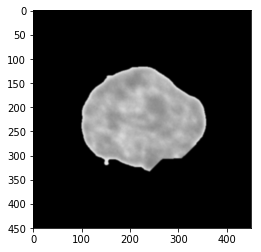

In [73]:
im = ALL_0_gray[217]
plt.imshow(im, cmap = 'gray', interpolation = 'bicubic')

ret,thresh = cv2.threshold(im,THRESH,255,cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
perimeter = cv2.arcLength(cnt,True)
area = cv2.contourArea(cnt)

print('my calculations')
print('size:', get_cell_size(im))
print('perimeter:', get_cell_perimeter(im))
print('built-in calculations')
print('perimeter:', perimeter)
print('area:', area)



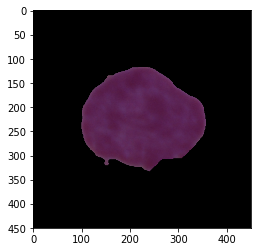

In [6]:
plt.imshow(ALL_0_color[217])